In [3]:
import pythd
from matplotlib import pyplot as plt

# Two intersecting circles with some noise
dataset = (pythd.datagen.DatasetGenerator()
                .circle(center=[-4.0, 0.0], radius=4.0, noise=0.06, num_points=200)
                .circle(center=[4.0, 0.0], radius=4.0, noise=0.06, num_points=200)).get()

# Setup MAPPER
filt = pythd.filter.IdentityFilter() # use x,y coordinates as filter
f_x = filt(dataset) # filter values
cover = pythd.cover.IntervalCover.EvenlySpacedFromValues(f_x, 4, 0.5)
clustering = pythd.clustering.HierarchicalClustering()
mapper = pythd.mapper.MAPPER(filter=filt, cover=cover, clustering=clustering)
res = mapper.run(dataset, f_x=f_x) # run clustering step of MAPPER
network = res.compute_k_skeleton(k=1) # compute the one skeleton

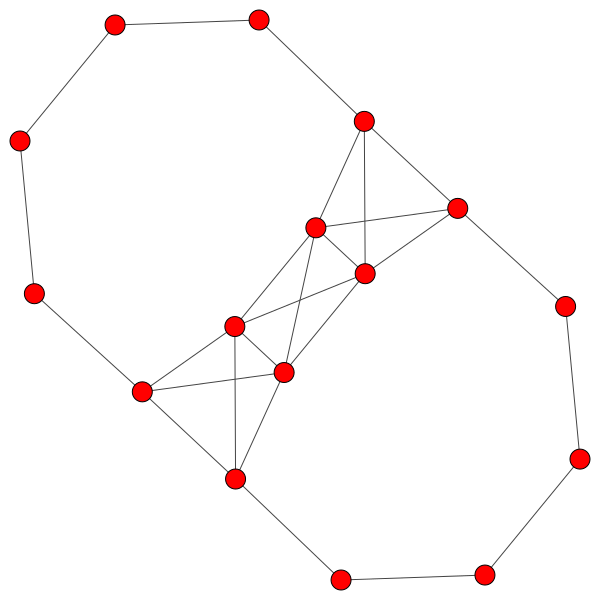

In [4]:
import igraph
g = res.get_igraph_network()
layout = g.layout_kamada_kawai() # graph layout from igraph
igraph.plot(g, layout=layout)

C:\Users\Kbrown\Anaconda2\envs\pytorch\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


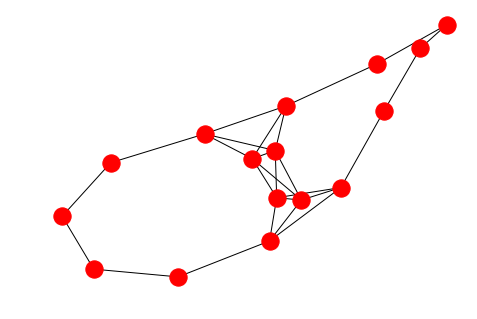

In [5]:
import networkx as nx
g = res.get_networkx_network()
nx.draw(g)

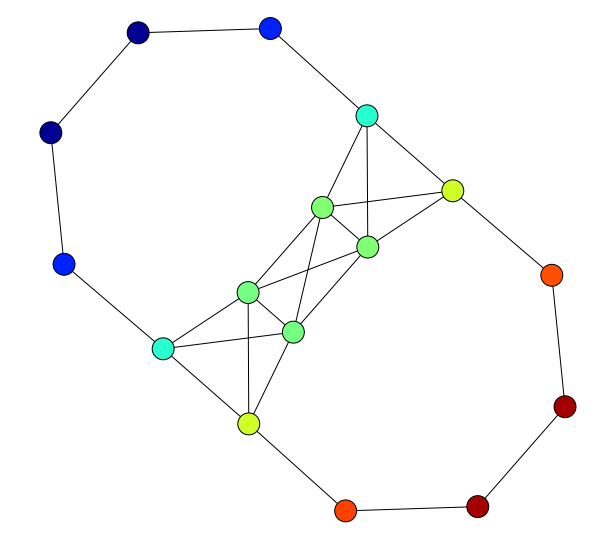

In [6]:
# re-using the layout computed from igraph above
coloring = pythd.coloring.create_node_coloring(f_x[:,0], network) # x-coordinate as coloring
pythd.plotting.draw_topological_network(network, layout, node_coloring=coloring)